In [1]:
# Core Libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Feature Selection
from sklearn.feature_selection import RFE

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

**Why did you choose this dataset & which UNSDG does it support?**
The Student Depression dataset was selected as it addresses mental health challenges among students.
This aligns with United Nations Sustainable Development Goal 3 (Good Health and Well-being), which
emphasizes the importance of mental health awareness and early intervention.

**Load Dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Student Depression Dataset.csv")
df.head()
target_column = "Depression"
#Dataset shape
print("Dataset Shape:", df.shape)

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Target distribution (class imbalance)
print("\nTarget Distribution:\n", df[target_column].value_counts())
print("\nTarget Distribution (%):\n", df[target_column].value_counts(normalize=True) * 100)

Dataset Shape: (27901, 18)

Missing Values:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

Target Distribution:
 Depression
1    16336
0    11565
Name: count, dtype: int64

Target Distribution (%):
 Depression
1    58.549873
0    41.450127
Name: proportion, 

**(a)** **When and by whom the dataset was created**

The Student Depression dataset was created by independent contributors and shared on an open data platform for educational and research purposes. The exact creation date and original author details are not explicitly stated; however, the dataset was compiled to analyze mental health indicators among students based on survey-style data.

**(b) How and from where the dataset was accessed**

The dataset was accessed from an online open-data repository and downloaded in CSV format. It was then loaded into the Python environment using the pandas library for analysis and modeling.

**(C) List and brief description of all attributes (features)**


Gender: Indicates the gender of the student

Age: Age of the student

Academic Pressure: Level of academic stress experienced

Sleep Duration: Average hours of sleep per day

Study Satisfaction: Satisfaction level with academic life

Work Pressure: Pressure from work or responsibilities

Depression: Target variable indicating whether the student is depressed

**Data Understanding & Cleaning**

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


**(1) Is there a relationship between academic pressure and depression among students?**

This question helps identify whether increased academic stress contributes to higher levels of depression.

**(2)Does sleep duration have an impact on the likelihood of student depression?**

This explores how lifestyle factors such as sleep affect mental well-being.


In [4]:
# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

**Exploratory Data Analysis (EDA)**

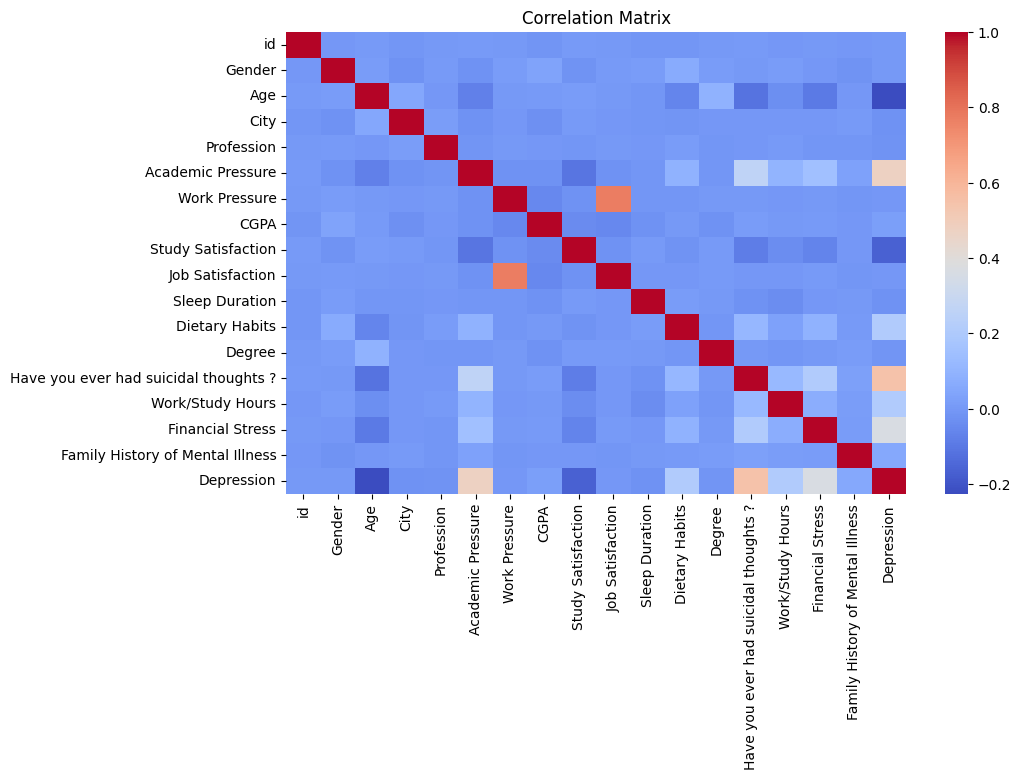

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()




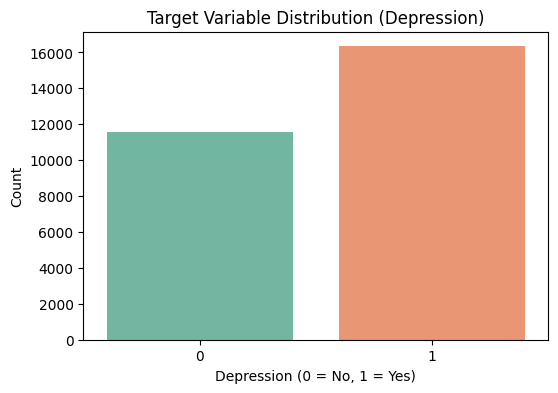

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='Depression',
    data=df,
    hue='Depression',          # assign hue to the same variable
    palette='Set2',
    legend=False               # hide duplicate legend
)
plt.title('Target Variable Distribution (Depression)')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


Numeric columns being plotted: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']


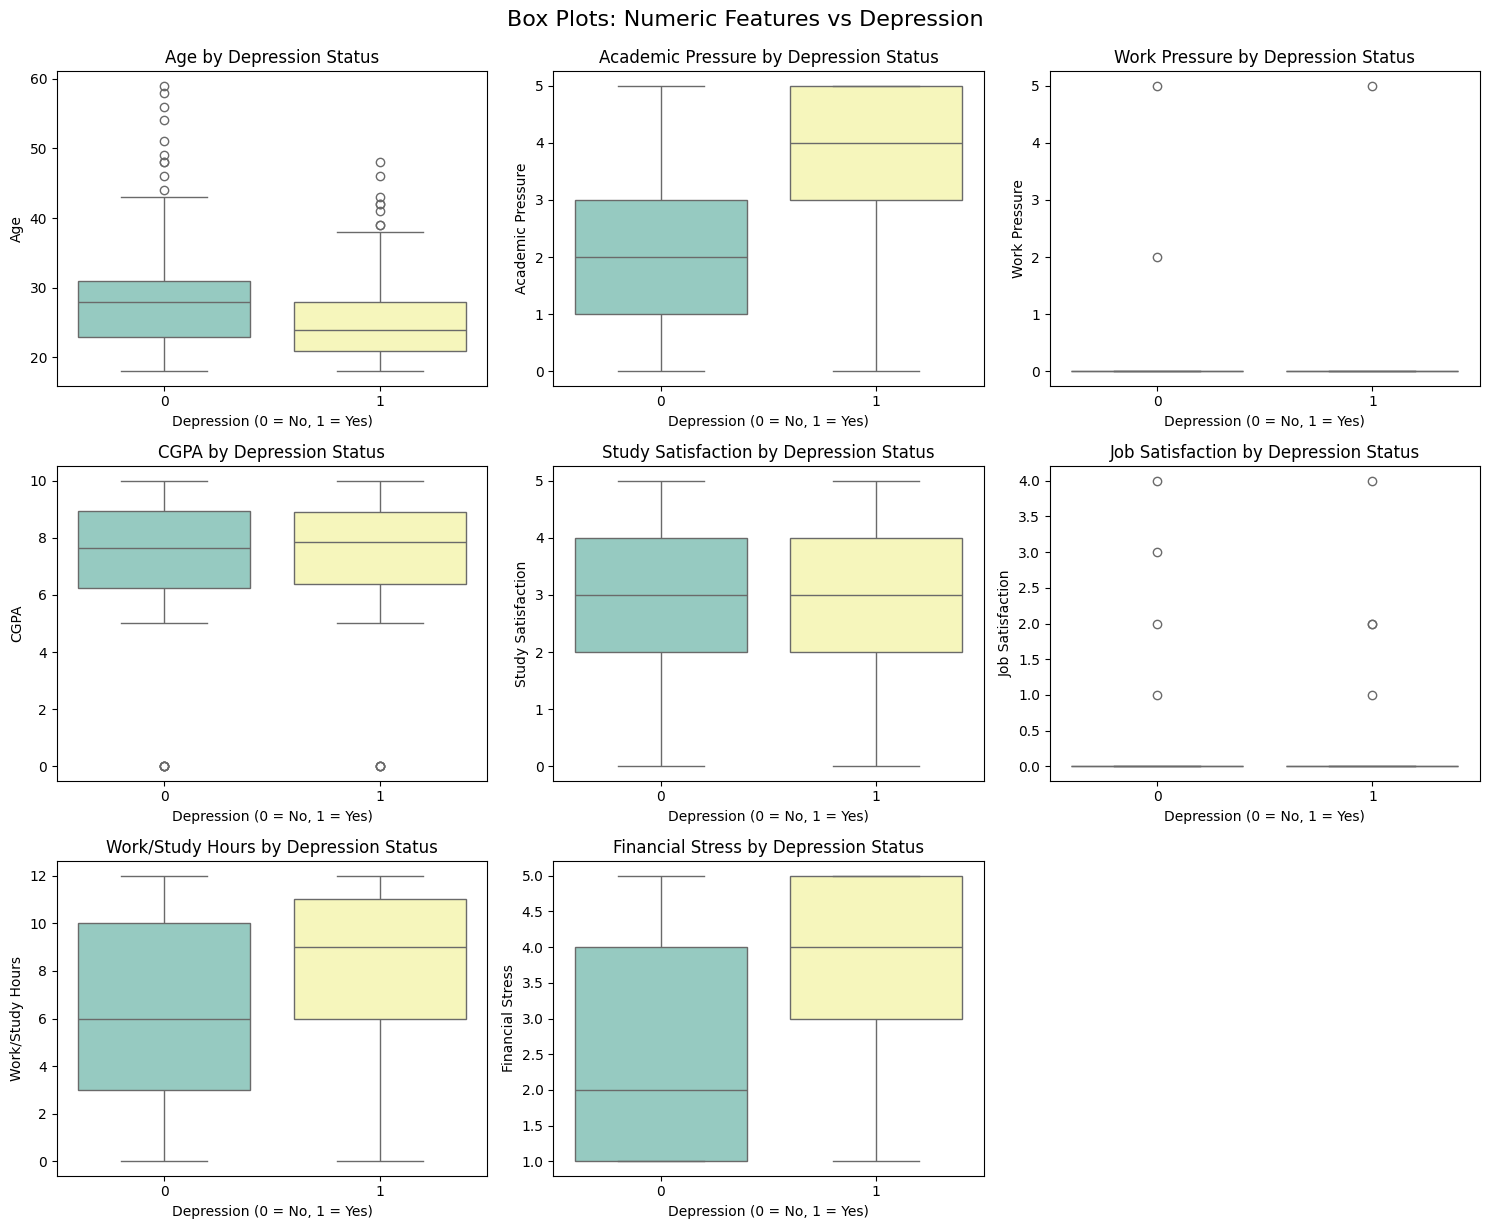

In [7]:
numeric_cols = [
    'Age',
    'Academic Pressure',
    'Work Pressure',
    'CGPA',
    'Study Satisfaction',
    'Job Satisfaction',
    'Work/Study Hours',
    'Financial Stress'
]
numeric_cols = [col for col in numeric_cols if col in df.columns]

print("Numeric columns being plotted:", numeric_cols)

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(
        x='Depression',
        y=col,
        data=df,
        hue='Depression',
        palette='Set3',
        legend=False
    )
    plt.title(f'{col} by Depression Status')
    plt.xlabel('Depression (0 = No, 1 = Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.suptitle('Box Plots: Numeric Features vs Depression', fontsize=16, y=1.02)
plt.show()

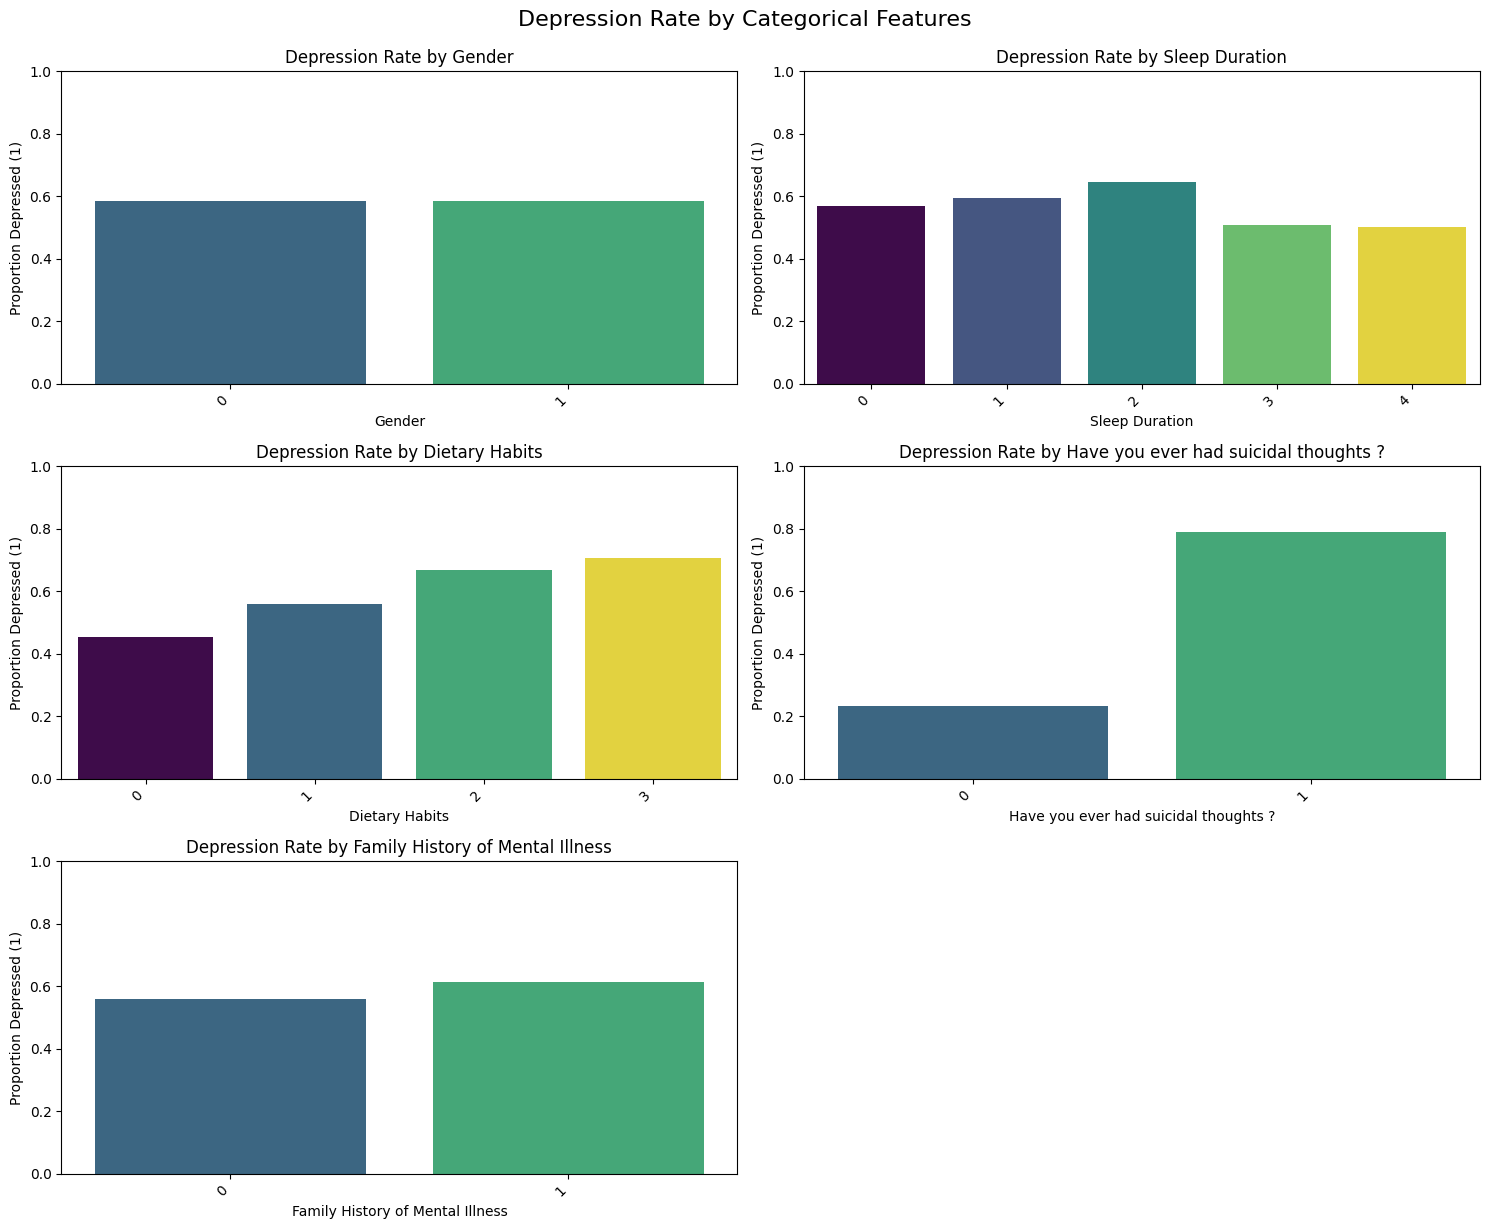

In [8]:
# Categorical bar plots - Depression proportion by category
categorical_cols = [
    'Gender',
    'Sleep Duration',
    'Dietary Habits',
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness'
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)

    # Proportion of Depression == 1
    prop = df.groupby(col)['Depression'].mean().sort_values(ascending=False)

    sns.barplot(
        x=prop.index,
        y=prop.values,
        hue=prop.index,
        palette='viridis',
        legend=False
    )

    plt.title(f'Depression Rate by {col}')
    plt.ylabel('Proportion Depressed (1)')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)

plt.tight_layout()
plt.suptitle('Depression Rate by Categorical Features', fontsize=16, y=1.02)
plt.show()

**Train-Test Split & Scaling**

In [9]:
X = df.drop("Depression", axis=1)
y = df["Depression"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [11]:
# Impute missing values with mean
imputer = SimpleImputer(strategy="mean")

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Neural Network Classifier (MLP)**

In [12]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=800,
    random_state=42
)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=800, random_state=42)

In [13]:
from sklearn.metrics import classification_report

print("Training Performance:")
print(classification_report(y_train, mlp.predict(X_train)))

print("Testing Performance:")
print(classification_report(y_test, mlp.predict(X_test)))


Training Performance:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      9252
           1       0.90      0.93      0.91     13068

    accuracy                           0.89     22320
   macro avg       0.89      0.89      0.89     22320
weighted avg       0.89      0.89      0.89     22320

Testing Performance:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2313
           1       0.83      0.85      0.84      3268

    accuracy                           0.81      5581
   macro avg       0.81      0.80      0.81      5581
weighted avg       0.81      0.81      0.81      5581



**Feature Selection (RFE)**

In [14]:
rfe = RFE(
    LogisticRegression(max_iter=1000),
    n_features_to_select=8
)

rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", list(selected_features))

X_train_sel = X_train[:, rfe.support_]
X_test_sel = X_test[:, rfe.support_]

Selected Features: ['Age', 'Academic Pressure', 'Study Satisfaction', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness']


**Hyperparameter Tuning (GridSearchCV)**

In [15]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1'
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best CV Score: 0.8545008288606976


**Classical ML Models**

**Logistic Regression**

In [16]:
final_lr = LogisticRegression(
    max_iter=1000,
    random_state=42
)

final_lr.fit(X_train, y_train)
y_pred_lr = final_lr.predict(X_test)



In [17]:
from sklearn.model_selection import cross_val_score

lr_cv_score = cross_val_score(
    final_lr,                 # Logistic Regression model
    X_train,        # FEATURES (must be 2D)
    y_train,            # TARGET
    cv=5,
    scoring='f1'
).mean()

print("Logistic Regression CV F1 Score:", lr_cv_score)

Logistic Regression CV F1 Score: 0.8713835853871658


In [18]:
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_prec = precision_score(y_test, y_pred_lr)
lr_rec = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

**Decision Tree**

In [21]:
final_dt = DecisionTreeClassifier(
    **grid.best_params_,
    random_state=42
)

final_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [27]:
final_dt.fit(X_train, y_train)
y_pred_dt = final_dt.predict(X_test)

In [28]:
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt)
dt_rec = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

In [29]:
def evaluate(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }

print("Logistic Regression:", evaluate(y_test, y_pred_lr))
print("Decision Tree:", evaluate(y_test, y_pred_dt))

Logistic Regression: {'Accuracy': 0.8423221644866511, 'Precision': 0.8553571428571428, 'Recall': 0.879436964504284, 'F1': 0.8672299336149668}
Decision Tree: {'Accuracy': 0.8152660813474287, 'Precision': 0.8133931073129729, 'Recall': 0.8883108935128519, 'F1': 0.8492028667544245}


**Final Classification Comparison**

In [30]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Features Used": [len(selected_features), len(selected_features)],
    "CV Score": [lr_cv_score, grid.best_score_],
    "Accuracy": [lr_acc, dt_acc],
    "Precision": [lr_prec, dt_prec],
    "Recall": [lr_rec, dt_rec],
    "F1 Score": [lr_f1, dt_f1]
})

comparison



,Model,Features Used,CV Score,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,8,0.871384,0.842322,0.855357,0.879437,0.867230
1,Decision Tree,8,0.854501,0.815266,0.813393,0.888311,0.849203
